File for graph creation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = "E:/!!Research/!!!Data/graph_analysis/igraph_metrics_data/lek_rolling_binary_global_metrics.csv"
df = pd.read_csv(data)
df = df[df['graph_type'] == 'average_dispersal']
df.head()

,Unnamed: 0,graph_type,year,density,avg_path_length,diameter,transitivity,clusters,mean_cluster_size,max_cluster_size
0,0,average_dispersal,1971,0.857143,1.142857,2,0.893853,1,21.0,21
1,1,average_dispersal,1972,0.849802,1.150198,2,0.890313,1,23.0,23
2,2,average_dispersal,1973,0.849802,1.150198,2,0.890313,1,23.0,23
3,3,average_dispersal,1974,0.855072,1.144928,2,0.893617,1,24.0,24
4,4,average_dispersal,1975,0.698851,1.455172,4,0.882843,1,30.0,30


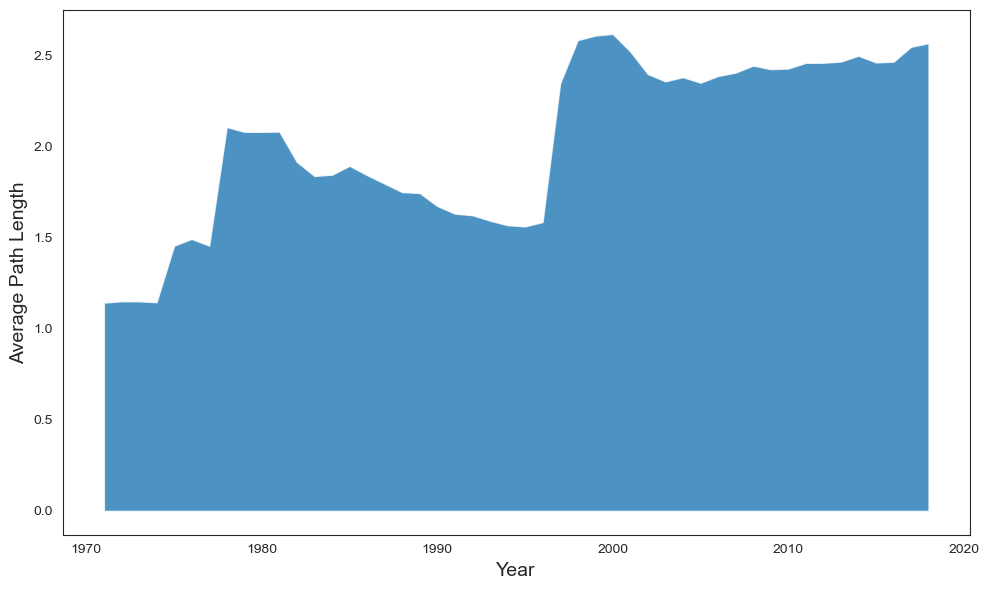

In [13]:
# Set the style
sns.set_style("white")

# Choose the column to plot
column = 'avg_path_length'

# Prepare data for stackplot
years = df['year']
cumulative_values = df[column] #.cumsum()  # Compute cumulative total for the column

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(years, cumulative_values, label=column, alpha=0.8)

# Add labels and legend
#ax.set_title(f'Stacked Area Plot for cumulative leks surveyed', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Average Path Length', fontsize=14)
# ax.legend(loc='upper left')

# Save the plot
plot_folder = "E:/!!Research/!!Documents/Documents_2024/manuscriptDraft24_connectivity/figures/graphs"
plt.savefig(f'{plot_folder}/average_dispersal_average_path_length.png', dpi=300, bbox_inches = 'tight')

plt.tight_layout()
plt.show()

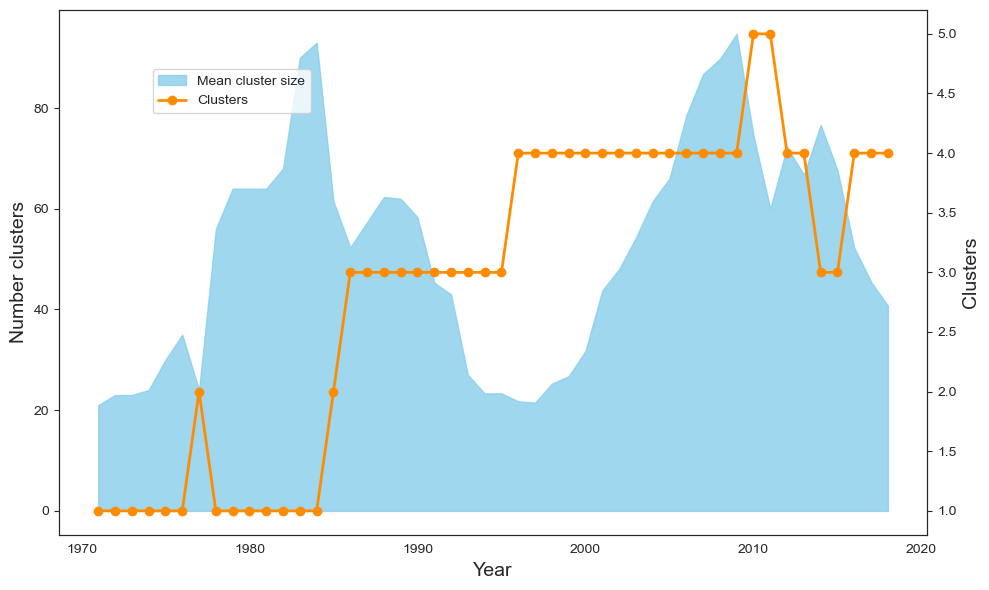

In [10]:
# Prepare data
years = df['year']
cumulative_values = df['mean_cluster_size']  # Cumulative totals
leks_surveyed = df['clusters']  # Number of leks surveyed

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the stacked area for cumulative totals
ax1.fill_between(years, cumulative_values, label='Mean cluster size', alpha=0.8, color='skyblue')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number clusters', fontsize=14)
ax1.tick_params(axis='y')

# Overlay the line plot for leks surveyed (secondary axis)
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(years, leks_surveyed, label='Clusters', color='darkorange', marker='o', linewidth=2)
ax2.set_ylabel('Clusters', fontsize=14)
ax2.tick_params(axis='y')

# Add legends and title
#fig.suptitle('Cumulative Totals and Leks Surveyed Over Years', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# Save and display the plot
plt.tight_layout()

# Save the plot
plot_folder = "E:/!!Research/!!Documents/Documents_2024/manuscriptDraft24_connectivity/figures/graphs"
plt.savefig(f'{plot_folder}/mean_cluster_size_vs_num_clusters.png', dpi=300, bbox_inches = 'tight')
plt.show()